In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [7]:
#Data preprocessing:
df_data=pd.read_csv(r'D:\aa sem 2\aaa lab\PRML\lab2\data10.csv')

In [8]:
df_data.head()

,x1,x2,x3,y1
0,1,1,2,1
1,1,1,4,1
2,1,1,5,1
3,1,1,6,1
4,1,1,8,1


In [11]:
# distribution of class ,whether binary or not
df_data['y1'].value_counts()

1    170
0    103
Name: y1, dtype: int64

In [12]:
# checking for missing values:
df_data.isnull().sum()

x1    0
x2    0
x3    0
y1    0
dtype: int64

In [14]:
# scaling of numeric data to avoid outliers
# standard scaler function is used
from sklearn.preprocessing import StandardScaler

#copying df
df_data_new=df_data.copy()
scaler=StandardScaler()
num_cols=['x1','x2','x2']
df_data_new[num_cols]=scaler.fit_transform(df_data_new[num_cols])
df_data_new

,x1,x2,x3,y1
0,-1.439253,-1.546282,2,1
1,-1.439253,-1.546282,4,1
2,-1.439253,-1.546282,5,1
3,-1.439253,-1.546282,6,1
4,-1.439253,-1.546282,8,1
...,...,...,...,...
268,1.692939,0.538335,6,0
269,1.692939,0.538335,8,0
270,1.692939,0.885772,8,0
271,1.692939,0.885772,10,0


In [17]:
# splitting the dataset for Traning and testing:

# select features:
feature=df_data_new.drop('y1',axis=1)

#select target
target=df_data_new['y1']

# select training and testing data:

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(feature,target,shuffle=True,test_size=0.2,random_state=1)

# show the Training and Testing data:
print('Shape of training feature:', x_train.shape)
print('Shape of testing feature:', x_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of training label:', y_test.shape)

Shape of training feature: (218, 3)
Shape of testing feature: (55, 3)
Shape of training label: (218,)
Shape of training label: (55,)


In [18]:
# Accuracy metrics:
def evaluate_model(model,x_test,y_test):
    from sklearn import metrics
    
    # predict test data
    y_pred=model.predict(x_test)
    
    # calculate accuracy,precision,recall,f1-score and Kappa coefficient
    
    acc=metrics.accuracy_score(y_test,y_pred)
    prec=metrics.precision_score(y_test,y_pred)
    rec=metrics.recall_score(y_test,y_pred)
    f1=metrics.f1_score(y_test,y_pred)
    kappa=metrics.cohen_kappa_score(y_test,y_pred)
    
    # display confusion matrix
    cm=metrics.confusion_matrix(y_test,y_pred)
    
    
    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa, 
             'cm': cm}    

In [19]:
# building model:

from sklearn import tree

# building decision tree model,
dtc=tree.DecisionTreeClassifier(random_state=0)
dtc.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

In [21]:
# Evaluate Model
dtc_eval = evaluate_model(dtc, x_test, y_test)

# Print result
print('Accuracy:', dtc_eval['acc'])
print('Precision:', dtc_eval['prec'])
print('Recall:', dtc_eval['rec'])
print('F1 Score:', dtc_eval['f1'])
print('Cohens Kappa Score:', dtc_eval['kappa'])
print('Confusion Matrix:\n', dtc_eval['cm'])

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Cohens Kappa Score: 1.0
Confusion Matrix:
 [[19  0]
 [ 0 36]]


In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

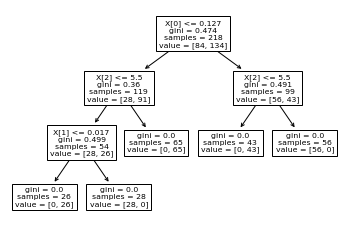

In [24]:
tree.plot_tree(dtc)
plt.show()